# Machine Learning Project - Phase 1 
## Phishing URL Detection using Machine Learning
### Yadhu Krishna M - AM.EN.U4CSE19264

---

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Data Pre-processing

In [2]:
raw_df = pd.read_csv("./dataset.csv")

In [3]:
raw_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


We have the following columns in our dataset.

In [4]:
raw_df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

We do not have any empty records in our dataset. 

In [5]:
any(list(raw_df.duplicated(subset=None,keep='first')))

False

In this project, we are only focusing on certain features derived from the URL. Therefore, we are extracting only those columns.

In [6]:
columns = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path' , 'https_token', 'port', 'tld_in_path', 'punycode', 'shortening_service', 
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'char_repeat', 'path_extension', 'status']

df = raw_df[columns]

In [7]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,port,tld_in_path,punycode,shortening_service,tld_in_subdomain,abnormal_subdomain,nb_subdomains,char_repeat,path_extension,status
0,37,19,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,0,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,0,phishing
2,126,50,1,4,1,0,1,2,0,3,...,0,0,0,0,1,0,3,2,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,2,3,0,legitimate


Now, we check if any of the columns has a null value. 

In [8]:
df.isnull().any()

length_url            False
length_hostname       False
ip                    False
nb_dots               False
nb_hyphens            False
nb_at                 False
nb_qm                 False
nb_and                False
nb_or                 False
nb_eq                 False
nb_underscore         False
nb_tilde              False
nb_percent            False
nb_star               False
nb_colon              False
nb_comma              False
nb_semicolumn         False
nb_dollar             False
nb_space              False
nb_www                False
nb_com                False
nb_dslash             False
http_in_path          False
https_token           False
port                  False
tld_in_path           False
punycode              False
shortening_service    False
tld_in_subdomain      False
abnormal_subdomain    False
nb_subdomains         False
char_repeat           False
path_extension        False
status                False
dtype: bool

We can see that there is no column with null value.

In [9]:
df.dtypes

length_url             int64
length_hostname        int64
ip                     int64
nb_dots                int64
nb_hyphens             int64
nb_at                  int64
nb_qm                  int64
nb_and                 int64
nb_or                  int64
nb_eq                  int64
nb_underscore          int64
nb_tilde               int64
nb_percent             int64
nb_star                int64
nb_colon               int64
nb_comma               int64
nb_semicolumn          int64
nb_dollar              int64
nb_space               int64
nb_www                 int64
nb_com                 int64
nb_dslash              int64
http_in_path           int64
https_token            int64
port                   int64
tld_in_path            int64
punycode               int64
shortening_service     int64
tld_in_subdomain       int64
abnormal_subdomain     int64
nb_subdomains          int64
char_repeat            int64
path_extension         int64
status                object
dtype: object

The last column `status` is having non-numerical data. So we map the column to numerical data. Here 1 indicates phishing and 0 indicates legitimate URLs.

In [10]:
df['status'] = (df['status'] != 'legitimate').astype(int)

In [11]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,port,tld_in_path,punycode,shortening_service,tld_in_subdomain,abnormal_subdomain,nb_subdomains,char_repeat,path_extension,status
0,37,19,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,0,0
1,77,23,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,0,1
2,126,50,1,4,1,0,1,2,0,3,...,0,0,0,0,1,0,3,2,0,1
3,18,11,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,55,15,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,2,3,0,0


Now, we have a dataset with only numerical data. We use MinMaxScaler to normalize the dataset.

In [12]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)

In [13]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,port,tld_in_path,punycode,shortening_service,tld_in_subdomain,abnormal_subdomain,nb_subdomains,char_repeat,path_extension,status
0,0.015347,0.071429,0.0,0.086957,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.027397,0.0,0.0
1,0.039902,0.090476,1.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027397,0.0,1.0
2,0.069982,0.219048,1.0,0.130435,0.023256,0.00,0.333333,0.105263,0.0,0.157895,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.013699,0.0,1.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0
4,0.026397,0.052381,0.0,0.043478,0.046512,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.020548,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0.020258,0.061905,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.027397,0.0,0.0
11426,0.044199,0.066667,0.0,0.173913,0.000000,0.25,0.333333,0.000000,0.0,0.052632,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.020548,0.0,1.0
11427,0.057090,0.057143,1.0,0.043478,0.139535,0.00,0.333333,0.000000,0.0,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.034247,0.0,0.0
11428,0.015961,0.123810,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.020548,0.0,0.0


## Data Summarization

We have 11430 rows and 34 columns.

In [14]:
df.shape

(11430, 34)

We can also notice that the dataset is balanced and there are 50% legitimate URLs and 50% phishing URLs.

In [15]:
df.groupby('status').size()

status
0.0    5715
1.0    5715
dtype: int64

The data is summarised as below:

In [16]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,port,tld_in_path,punycode,shortening_service,tld_in_subdomain,abnormal_subdomain,nb_subdomains,char_repeat,path_extension,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.030158,0.081382,0.150569,0.064381,0.023199,0.005556,0.047069,0.008542,0.0,0.015430,...,0.002362,0.065617,0.000350,0.123447,0.050131,0.021610,0.615836,0.020051,0.000175,0.500000
std,0.033946,0.051320,0.357644,0.059552,0.048537,0.038875,0.121485,0.043228,0.0,0.052543,...,0.048547,0.247622,0.018705,0.328964,0.218225,0.145412,0.318534,0.032664,0.013227,0.500022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012891,0.052381,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.006849,0.000000,0.000000
50%,0.021486,0.071429,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.020548,0.000000,0.500000
75%,0.036219,0.095238,0.000000,0.086957,0.023256,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.027397,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization

Now, we split the data into phishing and legitimate for easy visualization.

In [17]:
phishing = df[df['status'] == 1]
legitimate = df[df['status'] == 0]

On plotting a graph between length of the URL for Phishing and Legitimate, one can notice that phishing URLs are usually longer than legitimate.

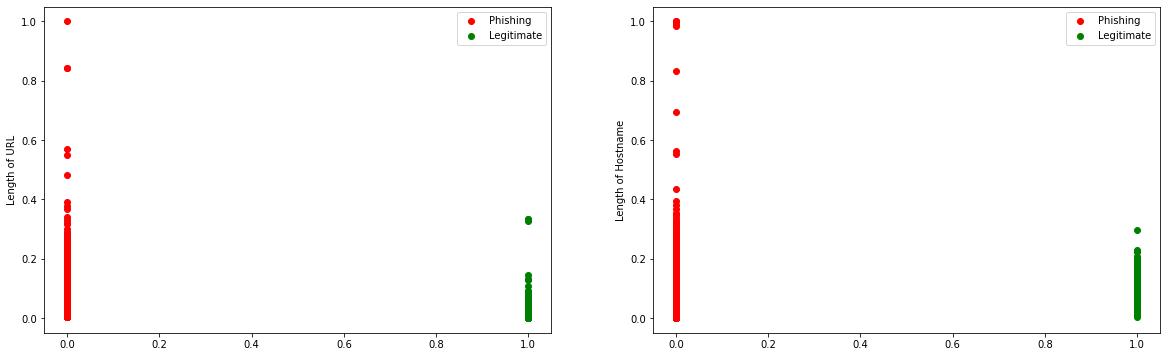

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.scatter([0]*len(phishing), phishing["length_url"], color = 'red')
plt.scatter([1]*len(legitimate), legitimate["length_url"], color = 'green')

plt.legend(["Phishing" , "Legitimate"])
plt.ylabel('Length of URL')

plt.subplot(1, 2, 2)
plt.scatter( [0]*len(phishing), phishing["length_hostname"], color = 'red')
plt.scatter([1]*len(legitimate), legitimate["length_hostname"], color = 'green')

plt.legend(["Phishing" , "Legitimate"])
plt.ylabel('Length of Hostname')

plt.show()

Now, ploting a histogram for some special features in URL.

In [19]:
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
       'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'port', 'tld_in_path', 'punycode',
       'shortening_service', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'char_repeat', 'path_extension', 'status'],
      dtype='object')

In [20]:
def plot_graph(columns):
    
    graph_data = {}
    
    for column in columns:
        graph_data[column] = [phishing[column].mean() , legitimate[column].mean()]

    phishing_count = [graph_data[x][0] for x in graph_data]
    legitimate_count = [graph_data[x][1] for x in graph_data]
    
    x = np.arange(len(columns)) 
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, phishing_count, width, label='Phishing')
    rects2 = ax.bar(x + width/2, legitimate_count, width, label='Legitimate')

    ax.set_ylabel('Count')
    ax.set_title('Features in dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    plt.show()   

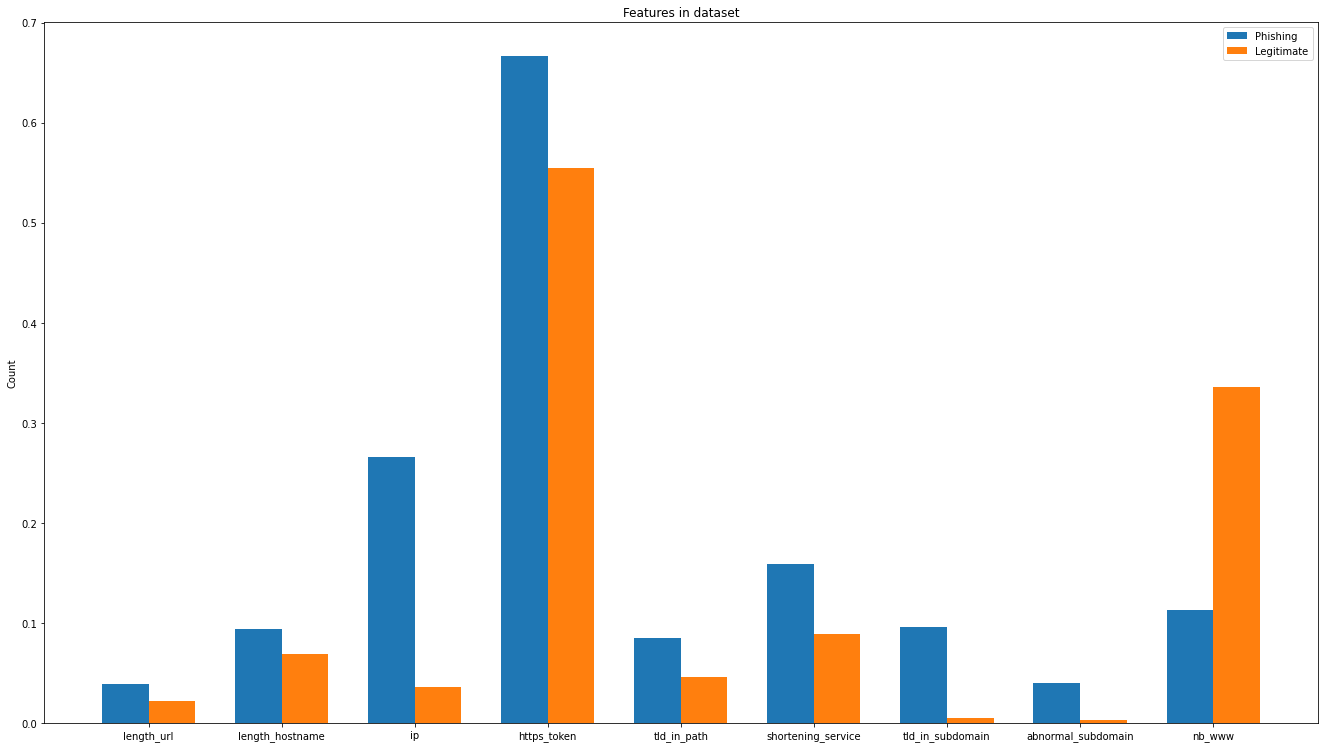

In [21]:
plot_graph(['length_url', 'length_hostname', 'ip', 
       'https_token', 'tld_in_path',
       'shortening_service', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_www'])

From the above graph, it is clearly distiguishable that certain features are present in phishing URLs than legitimate URLs.

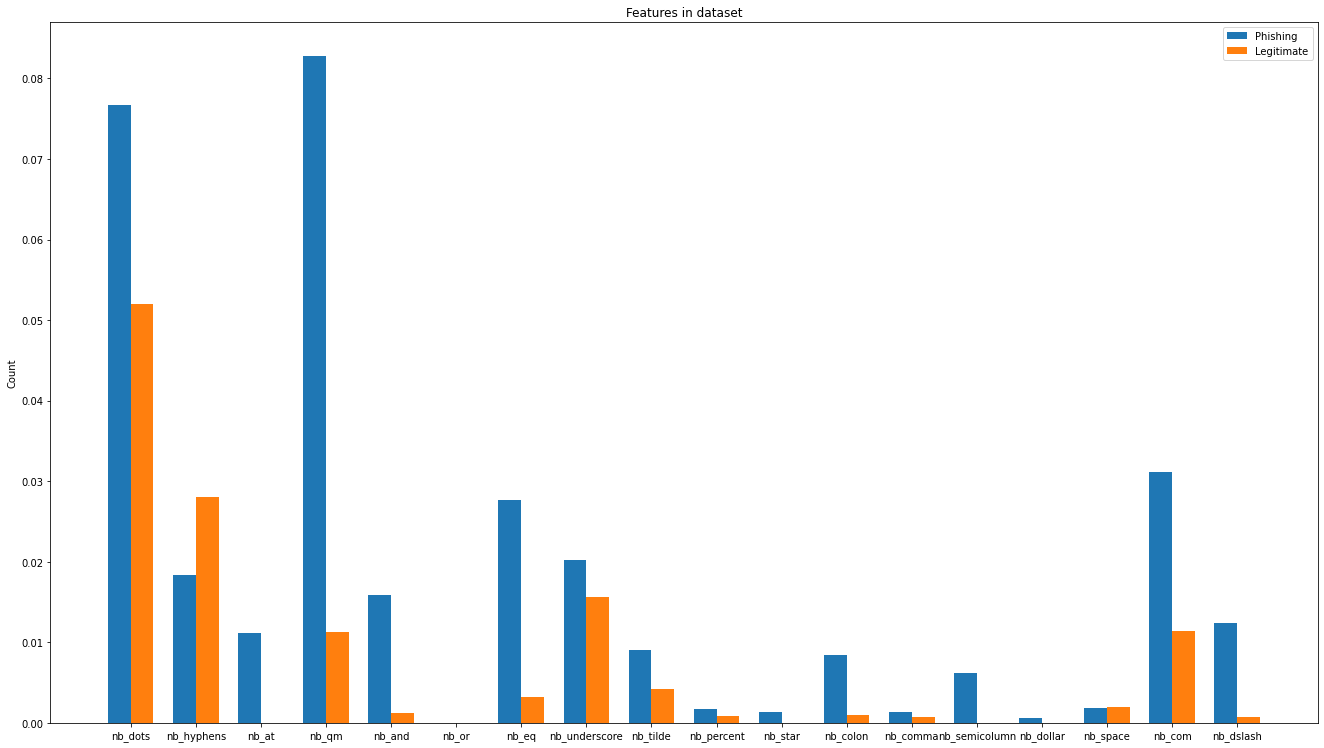

In [21]:
plot_graph(['nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_com', 'nb_dslash'])

From the above graph, it is clearly visible that phishing URLs have more special charecters as compared to legitimate URLs.

Finally exporting the cleaned dataset,

In [22]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,port,tld_in_path,punycode,shortening_service,tld_in_subdomain,abnormal_subdomain,nb_subdomains,char_repeat,path_extension,status
0,0.015347,0.071429,0.0,0.086957,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.027397,0.0,0.0
1,0.039902,0.090476,1.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027397,0.0,1.0
2,0.069982,0.219048,1.0,0.130435,0.023256,0.00,0.333333,0.105263,0.0,0.157895,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.013699,0.0,1.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0
4,0.026397,0.052381,0.0,0.043478,0.046512,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.020548,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0.020258,0.061905,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.027397,0.0,0.0
11426,0.044199,0.066667,0.0,0.173913,0.000000,0.25,0.333333,0.000000,0.0,0.052632,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.020548,0.0,1.0
11427,0.057090,0.057143,1.0,0.043478,0.139535,0.00,0.333333,0.000000,0.0,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.034247,0.0,0.0
11428,0.015961,0.123810,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.020548,0.0,0.0


In [23]:
df.to_csv("final_dataset.csv")